#Paul Peyssard project : Manipulation of the dataset Olympics Events

###This notebook is the code of a project supervised by Boris Shminke for the class Distributed Big Data Systems in the MSc 1 Data Science & Artificial Intelligence 2022-2023

In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.0 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
import json
import pandas
import os
from pyspark import pandas as pd
from pyspark.sql.functions import regexp_replace
from pyspark.sql.functions import mean, substring
import pyspark.sql.functions as F

#import opendatasets as od

In [0]:
#!pip install opendatasets
dbutils.fs.mkdirs("file:///root/.kaggle/")

Out[3]: True

In [0]:
dbutils.fs.ls("dbfs:///FileStore")
dbutils.fs.cp("dbfs:///FileStore/kaggle.json","file:///root/.kaggle/") #copy kaggle.json in root/..
dbutils.fs.ls("file:///root/.kaggle/") #verify

Out[4]: [FileInfo(path='file:/root/.kaggle/kaggle.json', name='kaggle.json', size=64, modificationTime=1673544430327)]

In [0]:
dbutils.fs.ls("dbfs:///FileStore")


Out[5]: [FileInfo(path='dbfs:/FileStore/dataAt.zip', name='dataAt.zip', size=5688662, modificationTime=1667999592000),
 FileInfo(path='dbfs:/FileStore/kaggle.json', name='kaggle.json', size=64, modificationTime=1667991145000)]

In [0]:
# -----------------------   FIRST STEP : READING DATA : Begining   -----------------------

In [0]:
!pip install kaggle
import kaggle #import kaggle using kaggle.json (api key)

     |████████████████████████████████| 58 kB 3.3 MB/s 
     |████████████████████████████████| 78 kB 4.3 MB/s 
     |████████████████████████████████| 78 kB 7.1 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=00b9423dad9224164c0f7e5769dbbade7c84e855c927fc048fec6bf67bc8aedd
  Stored in directory: /root/.cache/pip/wheels/ac/b2/c3/fa4706d469b5879105991d1c8be9a3c2ef329ba9fe2ce5085e
Successfully built kaggle
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-82a9d8f1-9f83-47ee-9d40-293d931814ab/bin/python -m pip install --upgrade pip' command.


In [0]:
#!kaggle datasets download -d samruddhim/olympics-althlete-events-analysis  #dowload athlete dataset
#dataset used in the project : https://www.kaggle.com/datasets/samruddhim/olympics-althlete-events-analysis

In [0]:
#!unzip olympics-althlete-events-analysis.zip #unziping the zip --> obtain athlete_events.csv

In [0]:
file_name = "athlete_events.csv"
# this is a local (linux) path
file_path = os.path.join(os.getcwd(), file_name)
print(file_path)

/databricks/driver/athlete_events.csv


In [0]:
#dbutils.fs.cp(f"file://{file_path}","dbfs:///")

In [0]:
raw_lines = spark.read.csv(
    f"dbfs:///{file_name}"
).to_pandas_on_spark()

/databricks/spark/python/pyspark/sql/dataframe.py:3607: FutureWarning: DataFrame.to_pandas_on_spark is deprecated. Use DataFrame.pandas_api instead.
  warnings.warn(


In [0]:
raw_lines.spark.frame().cache().count()

Out[13]: 271117

In [0]:
raw_lines.head(10)

,_c0,_c1,_c2,_c3,_c4,_c5,_c6,_c7,_c8,_c9,_c10,_c11,_c12,_c13,_c14
0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA
2,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NA
3,3,Gunnar Nielsen Aaby,M,24,NA,NA,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NA
4,4,Edgar Lindenau Aabye,M,34,NA,NA,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NA
6,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NA
7,5,Christine Jacoba Aaftink,F,25,185,82,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NA
8,5,Christine Jacoba Aaftink,F,25,185,82,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NA
9,5,Christine Jacoba Aaftink,F,27,185,82,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NA


In [0]:
#a delete si non use
raw_linesSpark = spark.read.csv(
    f"dbfs:///{file_name}"
)

In [0]:
# -----------------------   FIRST STEP : READING DATA : Done   -----------------------

In [0]:
# -----------------------   SECOND STEP : Transforming data : Begining  -----------------------

In [0]:
#Now : transforming data (extracting features, dealing with missing values if any, etc)
df=raw_linesSpark #just to rename
dfSave=raw_linesSpark #In order to save
pandas_df = pd.DataFrame(raw_linesSpark) #to verify

print(type(df))
print(type(pandas_df))

<class 'pyspark.sql.dataframe.DataFrame'>
<class 'pyspark.pandas.frame.DataFrame'>


In [0]:
df.summary().show()
#Here we can see that we have a problem of columns names.

+-------+-----------------+--------------------+------------+-----------------+------------------+------------------+--------------------+--------+-----------+------------------+------------------+------------------+-----------+--------------------+--------------------+
|summary|              _c0|                 _c1|         _c2|              _c3|               _c4|               _c5|                 _c6|     _c7|        _c8|               _c9|              _c10|              _c11|       _c12|                _c13|                _c14|
+-------+-----------------+--------------------+------------+-----------------+------------------+------------------+--------------------+--------+-----------+------------------+------------------+------------------+-----------+--------------------+--------------------+
|  count|           271117|              271117|      271117|           271117|            271117|            271117|              271117|  271117|     271117|            271117|         

In [0]:
#Renaming column with good feature names
for i in df.columns:
    df = df.withColumnRenamed(i,pandas_df[i][0])



In [0]:
#deleting first row that also contains features name
df=df.where(df.ID!=0)


In [0]:
pd.DataFrame(df).head(2)
#Now we have a good branding of our features.

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA
1,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NA


In [0]:
pd.DataFrame(df).tail(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271106,135565,Fernando scar Zylberberg,M,27,168,76,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NA
271107,135566,"""James Francis """"Jim"""" Zylker""",M,21,175,75,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NA
271108,135567,Aleksandr Viktorovich Zyuzin,M,24,183,72,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NA
271109,135567,Aleksandr Viktorovich Zyuzin,M,28,183,72,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NA
271110,135568,Olga Igorevna Zyuzkova,F,33,171,69,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NA
271111,135569,Andrzej ya,M,29,179,89,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NA
271112,135570,Piotr ya,M,27,176,59,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NA
271113,135570,Piotr ya,M,27,176,59,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NA
271114,135571,Tomasz Ireneusz ya,M,30,185,96,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NA
271115,135571,Tomasz Ireneusz ya,M,34,185,96,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NA


In [0]:
#Let's analyze the dataset :
#Is there any null values ? 
from pyspark.sql.functions import count,when, isnan, col
import pyspark.sql.functions
df.select(
    [
        count(
            when(
                isnan(num)
                | col(num).isNull()
                | (col(num) == "NA")
                | (col(num) == "unknown")
                | (col(num) == "null"),
                num,
            )
        ).alias(num)
        for num in df.columns]
).show()

+---+----+---+----+------+------+----+---+-----+----+------+----+-----+-----+------+
| ID|Name|Sex| Age|Height|Weight|Team|NOC|Games|Year|Season|City|Sport|Event| Medal|
+---+----+---+----+------+------+----+---+-----+----+------+----+-----+-----+------+
|  0|   0|  0|9472| 59999| 62857| 186|  6|    0|   0|     0|   0|    0|    0|230893|
+---+----+---+----+------+------+----+---+-----+----+------+----+-----+-----+------+



In [0]:
#For the medals, teams and nocs there is no problem but for the Age, Height and Weight, I will rerplace the null value with the mean of their sports.

df.select(mean('Age')).show()
df.select(mean('Height')).show()
df.select(mean('Weight')).show()



+-----------------+
|         avg(Age)|
+-----------------+
|25.55966371742454|
+-----------------+

+------------------+
|       avg(Height)|
+------------------+
|174.85806925299607|
+------------------+

+-----------------+
|      avg(Weight)|
+-----------------+
|70.94766612727422|
+-----------------+



In [0]:
#Here, I only replaced "NA" because it was the only type of null/missing value we had in this dataset
#mean_age=df
df=df.withColumn('Age', regexp_replace('Age', 'NA', "25"))
df=df.withColumn('Height', regexp_replace('Height', 'NA', "175"))
df=df.withColumn('Weight', regexp_replace('Weight', 'NA', "71"))


In [0]:
#Let's analyze the dataset :
#Is there any null values ? 

df.select(
    [
        count(
            when(
                isnan(num)
                | col(num).isNull()
                | (col(num) == "NA")
                | (col(num) == "unknown")
                | (col(num) == "null"),
                num,
            )
        ).alias(num)
        for num in df.columns]
).show()

+---+----+---+---+------+------+----+---+-----+----+------+----+-----+-----+------+
| ID|Name|Sex|Age|Height|Weight|Team|NOC|Games|Year|Season|City|Sport|Event| Medal|
+---+----+---+---+------+------+----+---+-----+----+------+----+-----+-----+------+
|  0|   0|  0|  0|     0|     0| 186|  6|    0|   0|     0|   0|    0|    0|230893|
+---+----+---+---+------+------+----+---+-----+----+------+----+-----+-----+------+



In [0]:
#Checking the unique values :

for i in df.columns:
    unique=df.select(i).distinct().collect()
    print(i,": number of unique value :",len(unique))
    if len(unique)<500:
        print(pd.DataFrame(df)[i].value_counts())
    
#In the table below you can see all the unique values for the different feature of the dataset

ID : number of unique value : 135571
Name : number of unique value : 134727
Sex : number of unique value : 76
M                   196086
F                    74357
 Jr."                  355
 III"                   79
 Sr."                   31
 IV"                    22
 II"                    17
 -McCoy)"               12
 -Smith)"                8
 -Zuschneid)"            7
 -Sims)"                 7
 -Neale)"                6
 -Pike)"                 6
 -Livingstone)"          6
 -Hunter)"               6
 -Greer)"                4
 -Jager                  4
 -Grote)"                4
 -de Wit)"               4
 -Allinger)"             4
 -Russell)"              3
 -Connolly)"             3
 -de Glas)"              3
 -Zaharias)"             3
 -d'Oriola)"             3
 -Garciaparra)"          3
 -Wolf)"                 3
 -Nuttall)"              3
 -Wyatt)"                3
 -Doane)"                2
 -Brown)"                2
 -Luby)"                 2
 -Merrill)"              2

In [0]:
#We can see that there is some feature with problems in the dataset, we are going to try to clean it and deal with some errors and outliers.
#Lets filter some value that seems not relevant or innapropriate 

#In the Sex columns, there is some people with Family name instead of sex descriptions, In my opinions, these rows are not usable so I will delete it as we cant know their sex and its a big problem is sport.

df = df.filter(
               ((F.col("Sex") == "M")) | (F.col("Sex")=="F")
               )
print("New sex unique values :",df.select("Sex").distinct().collect())


New sex unique values : [Row(Sex='F'), Row(Sex='M')]


In [0]:
#For the ages, we can see again that there is some non numerical value inside the column

#We will get rid oh these columns by only selecting numbers
df = df.filter(
               ((F.col("Age") < 100))
               )

#The minimum age for the olympics is 13
#source : https://go.gale.com/ps/i.do?id=GALE%7CA268478186&sid=googleScholar&v=2.1&it=r&linkaccess=abs&issn=19211651&p=AONE&sw=w&userGroupName=anon%7Ee032f300

df=df.where(df.Age>13)
print("New age unique values :",df.select("Age").distinct().collect())


New age unique values : [Row(Age='51'), Row(Age='54'), Row(Age='15'), Row(Age='29'), Row(Age='69'), Row(Age='42'), Row(Age='73'), Row(Age='64'), Row(Age='30'), Row(Age='34'), Row(Age='59'), Row(Age='22'), Row(Age='28'), Row(Age='35'), Row(Age='16'), Row(Age='52'), Row(Age='71'), Row(Age='47'), Row(Age='43'), Row(Age='31'), Row(Age='18'), Row(Age='70'), Row(Age='27'), Row(Age='61'), Row(Age='75'), Row(Age='17'), Row(Age='26'), Row(Age='46'), Row(Age='60'), Row(Age='68'), Row(Age='19'), Row(Age='23'), Row(Age='41'), Row(Age='55'), Row(Age='38'), Row(Age='40'), Row(Age='25'), Row(Age='44'), Row(Age='53'), Row(Age='58'), Row(Age='33'), Row(Age='48'), Row(Age='67'), Row(Age='84'), Row(Age='24'), Row(Age='32'), Row(Age='20'), Row(Age='56'), Row(Age='36'), Row(Age='37'), Row(Age='49'), Row(Age='63'), Row(Age='65'), Row(Age='39'), Row(Age='62'), Row(Age='21'), Row(Age='14'), Row(Age='72'), Row(Age='74'), Row(Age='50'), Row(Age='45'), Row(Age='57'), Row(Age='88'), Row(Age='66'), Row(Age='76'), 

In [0]:
#Same process for height
#taking only the numerical values 

df = df.filter(
               ((F.col("Height") < 1000))
               )

#Then let's try to have only coherent value for Height and olympic sports
df=df.where(df.Height>100)
#Also for weight :
df=df.where(df.Weight>40)

#I did not find any limitations for the heights and weights in the olympic game so I tried to eliminate the value that seems to low for me in order to compete according to what we can see in the unique values above 

print("New height unique values :",df.select("Height").distinct().collect())

New height unique values : [Row(Height='169'), Row(Height='205'), Row(Height='155'), Row(Height='154'), Row(Height='132'), Row(Height='200'), Row(Height='162'), Row(Height='146'), Row(Height='139'), Row(Height='160'), Row(Height='184'), Row(Height='203'), Row(Height='199'), Row(Height='183'), Row(Height='171'), Row(Height='187'), Row(Height='188'), Row(Height='195'), Row(Height='223'), Row(Height='214'), Row(Height='179'), Row(Height='202'), Row(Height='221'), Row(Height='163'), Row(Height='174'), Row(Height='206'), Row(Height='168'), Row(Height='218'), Row(Height='166'), Row(Height='140'), Row(Height='164'), Row(Height='207'), Row(Height='147'), Row(Height='208'), Row(Height='198'), Row(Height='185'), Row(Height='201'), Row(Height='177'), Row(Height='194'), Row(Height='197'), Row(Height='167'), Row(Height='189'), Row(Height='190'), Row(Height='156'), Row(Height='135'), Row(Height='176'), Row(Height='193'), Row(Height='204'), Row(Height='213'), Row(Height='150'), Row(Height='170'), Row

In [0]:
#We have Games, year and season that approximately means the same things, we are going to change thing in order to have a clearer dataset.

#Keeping only the year in year columns
df=df.withColumn('Year', substring('Year', 1,4))

df = df.filter(
               ((F.col("Year") > 1000)) #to select only numerical
               )

print("New height unique values :",df.select("Year").distinct().collect())

New height unique values : [Row(Year='1956'), Row(Year='2016'), Row(Year='1936'), Row(Year='2012'), Row(Year='1972'), Row(Year='1988'), Row(Year='1932'), Row(Year='2014'), Row(Year='1984'), Row(Year='2000'), Row(Year='1906'), Row(Year='2002'), Row(Year='1964'), Row(Year='2006'), Row(Year='1908'), Row(Year='1904'), Row(Year='1976'), Row(Year='1968'), Row(Year='1924'), Row(Year='2004'), Row(Year='1992'), Row(Year='2008'), Row(Year='1900'), Row(Year='1994'), Row(Year='1996'), Row(Year='1980'), Row(Year='1960'), Row(Year='1896'), Row(Year='1948'), Row(Year='1952'), Row(Year='1912'), Row(Year='1998'), Row(Year='2010'), Row(Year='1928'), Row(Year='1920')]


In [0]:
#Deleting the games one
df=df.drop("Games")

In [0]:
#Verify and keeping only summer and winter in the season feature
pd.DataFrame(df)['Season'].value_counts()

Out[34]: Summer    220445
Winter     48373
Name: Season, dtype: int64

In [0]:
#We can see that there is a lot of NA values but it means that the person did not win any medals as there is only 3 medal per sport
pd.DataFrame(df)['Medal'].value_counts()

Out[35]: NA        229430
Gold       13196
Bronze     13184
Silver     13008
Name: Medal, dtype: int64

In [0]:
#test filter sports to have a cleaner overview of the dataset
judo=df.filter(
               ((F.col("Sport") == "Judo")&(F.col("Team") == "France")) 
               )

pd.DataFrame(judo).head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,1131,Clarisse Agbegnenou,F,23,164,66,France,FRA,2016,Summer,Rio de Janeiro,Judo,Judo Women's Half-Middleweight,Silver
1,2341,Pierre Albertini,M,30,185,87,France,FRA,1972,Summer,Munich,Judo,Judo Men's Half-Heavyweight,NA
2,2589,Marc Robert Alexandre,M,24,170,73,France,FRA,1984,Summer,Los Angeles,Judo,Judo Men's Half-Lightweight,Bronze
3,2589,Marc Robert Alexandre,M,28,170,73,France,FRA,1988,Summer,Seoul,Judo,Judo Men's Lightweight,Gold
4,3672,milie Andol,F,28,170,97,France,FRA,2016,Summer,Rio de Janeiro,Judo,Judo Women's Heavyweight,Gold


In [0]:
#Some plot in order to visualize the data
#exemple : Comparison of Height and Weight in french judo
judo=pd.DataFrame(judo)
judo.plot.scatter(x='Weight', y='Height')  

In [0]:
#We can see that all the types are object but we need to set the right types (double) for numerical values at least
pd.DataFrame(df).dtypes

Out[37]: ID        object
Name      object
Sex       object
Age       object
Height    object
Weight    object
Team      object
NOC       object
Year      object
Season    object
City      object
Sport     object
Event     object
Medal     object
dtype: object

In [0]:
#Changing numerical value into the right type (double)
num=["ID","Age","Height","Weight","Year"]
cat=["Age","Height","Weight","Year"]

for i in num:
    df=df.withColumn(i,df[i].cast('double'))
    
 


In [0]:
pd.DataFrame(df).dtypes

Out[39]: ID        float64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Year      float64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [0]:
#Let's check the correlations 
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

df_corr = df.select(num)
num_vector_col = "corr_features"
corr_assembler = VectorAssembler(
    inputCols=df_corr.columns,
    outputCol=num_vector_col,
)
df_vect = corr_assembler.transform(df_corr).select(num_vector_col)
matrix=Correlation.corr(df_vect,num_vector_col).collect()[0][0]

#reference=https://www.youtube.com/watch?v=R4mkiDj2oys&ab_channel=StatsWire

In [0]:
matrix=matrix.toArray().tolist()
pd.DataFrame(matrix,num) #I often use pd in order to plot small dataframe because I find it more readable

#Here, we can see that Height and Weight have a large correlation but In my opinion it is important to keep those 2 because it is 2 of the biggest important features in sport.
#source : https://www.specialolympics.ca/british-columbia/news/how-height-and-weight-affect-performance

,0,1,2,3,4
ID,1.000000,-0.002535,-0.007009,-0.006241,0.011303
Age,-0.002535,1.000000,0.083534,0.145651,-0.101914
Height,-0.007009,0.083534,1.000000,0.777620,0.049672
Weight,-0.006241,0.145651,0.777620,1.000000,0.012636
Year,0.011303,-0.101914,0.049672,0.012636,1.000000


<command-1124040285393801>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+attr)
<command-1124040285393801>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+attr)


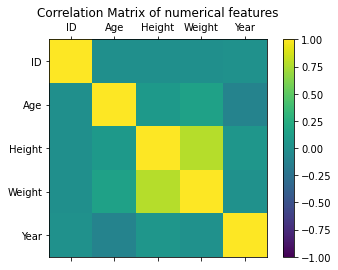

In [0]:
#Another way of seeing correlations, heatmap :
def plot_corr_matrix(correlations,attr,fig_no):
    fig=plt.figure(fig_no)
    ax=fig.add_subplot(111)
    ax.set_title("Correlation Matrix of numerical features")
    ax.set_xticklabels(['']+attr)
    ax.set_yticklabels(['']+attr)
    cax=ax.matshow(correlations,vmax=1,vmin=-1)
    fig.colorbar(cax)
    plt.show()

plot_corr_matrix(matrix, num, 234)

In [0]:
# -----------------------   SECOND STEP : Transforming data : DONE  -----------------------

In [0]:
# -----------------------   THIRD STEP : Applying machine learning model : Begining  -----------------------
#references : 
#https://github.com/saurfang/spark-knn
#https://people.stat.sc.edu/haigang/sparkCaseStudy.html
#https://towardsdatascience.com/a-tutorial-using-spark-for-big-data-an-example-to-predict-customer-churn-9078ac9a1e85
#https://intellipaat.com/blog/tutorial/spark-tutorial/machine-learning-with-pyspark-tutorial/

In [0]:
pd.DataFrame(df).head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,1.0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA
1,2.0,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NA


In [0]:
from pyspark.ml.feature import StringIndexer, VectorAssembler, OneHotEncoder
from pyspark.ml import Pipeline
num=["Age","Height","Weight","Year"] 
cat=['Team','NOC','Season','City','Sport','Event','Medal'] #After re thinking we will not need any name
df2=df

In [0]:
pd.DataFrame(df2).head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,1.0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA
1,2.0,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NA


In [0]:
df_try=df2 #In order to try things and save the dataframe

#Features to select
cat_cols = ['Team','NOC','Season','City','Sport','Event','Medal']
num_cols = ["Age","Height","Weight","Year"] 

#Encoding the different features 
indexers = [StringIndexer(inputCol = c, outputCol="{0}_indexed".format(c)) for c in cat_cols]
encoders = [StringIndexer(inputCol = indexer.getOutputCol(), outputCol = "{0}_encoded".format(indexer.getOutputCol())) 
for indexer in indexers]

encoders=encoders[0:-1] #In order to delete Medal from the final features in order to predict it correctly (Medal being the last (-1) element)

#Assembling the categorical features inside a single vector cat
assemblerCat = VectorAssembler(inputCols = [encoder.getOutputCol() for encoder in encoders], outputCol = "cat")

pipelineCat = Pipeline(stages = indexers + encoders + [assemblerCat])
df_try = pipelineCat.fit(df_try).transform(df_try)

#Assembling the numerical features inside a single vector num
assemblerNum = VectorAssembler(inputCols = num_cols, outputCol = "num")

pipelineNum = Pipeline(stages = [assemblerNum])
df_try = pipelineNum.fit(df_try).transform(df_try)

#Assembling cat and num inside a single vector features
assembler = VectorAssembler(inputCols = ["cat", "num"], outputCol = "features")

pipeline = Pipeline(stages = [assembler])
df_try = pipeline.fit(df_try).transform(df_try)

In [0]:
pd.DataFrame(df_try).head(2)

/databricks/spark/python/pyspark/sql/pandas/conversion.py:119: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field cat. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,Team_indexed,NOC_indexed,Season_indexed,City_indexed,Sport_indexed,Event_indexed,Medal_indexed,Team_indexed_encoded,NOC_indexed_encoded,Season_indexed_encoded,City_indexed_encoded,Sport_indexed_encoded,Event_indexed_encoded,cat,num,features
0,1.0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA,18.0,18.0,0.0,6.0,19.0,4.0,0.0,18.0,18.0,0.0,6.0,19.0,4.0,"[18.0, 18.0, 0.0, 6.0, 19.0, 4.0]","[24.0, 180.0, 80.0, 1992.0]","[18.0, 18.0, 0.0, 6.0, 19.0, 4.0, 24.0, 180.0,..."
1,2.0,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NA,18.0,18.0,0.0,0.0,22.0,255.0,0.0,18.0,18.0,0.0,0.0,22.0,255.0,"[18.0, 18.0, 0.0, 0.0, 22.0, 255.0]","[23.0, 170.0, 60.0, 2012.0]","[18.0, 18.0, 0.0, 0.0, 22.0, 255.0, 23.0, 170...."


In [0]:
from pyspark.ml.feature import PCA

#Let's use PCA regression in order to be able to use rf classifier (otherwise i would get some errors)
#The error was that the DecisionTree requires maxBins (= 32), I think it was caused by a too large number of value.
#I tried many things in order to solve it but nothing worked until I used PCA which helps to reduce dimension
#I put the whole error message on the cell below

pca_model = PCA(k = 10,inputCol = "features", outputCol = "pca_features")
model = pca_model.fit(df_try)
df_try = model.transform(df_try)

In [0]:
#IllegalArgumentException: requirement failed: DecisionTree requires maxBins (= 32) to be at least as large as the number of values in each categorical feature, but categorical feature 0 has 1183 values. Consider removing this and other categorical features with a large number of values, or add more training examples.

In [0]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator as BCE, MulticlassClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier

#Lets find the best parameters of random forest with a small sample of the dataset

small_sample = df_try.sample(False, 0.001).cache()

pca_model = PCA(inputCol = "features", outputCol = "pca_features_cv")
rf = RandomForestClassifier(labelCol = "Medal_indexed", featuresCol = "pca_features_cv")
ppl_cv = Pipeline(stages = [pca_model, rf])

paramGrid = (
    ParamGridBuilder() 
    .addGrid(pca_model.k, [3,4,10]) 
    .addGrid(rf.numTrees, [20, 30, 50]) 
    .build()
)


evaluator = MulticlassClassificationEvaluator(labelCol="Medal_indexed")
#MulticlassClassificationEvaluator multiEvaluator
crossval = CrossValidator(estimator = ppl_cv,
                        estimatorParamMaps=paramGrid,
                        evaluator = evaluator,
                        numFolds= 3
                         )

cv_model = crossval.fit(small_sample)

In [0]:
(train, test) = df_try.randomSplit([0.7, 0.3], 2017)

In [0]:
#Result of the random forest
rf_evaluator=evaluator.evaluate(cv_model.transform(test))
print("Result of the random forest evaluator : ",rf_evaluator)

Result of the random forest evaluator :  0.7870736978951464


In [0]:
from pyspark.ml.classification import LogisticRegression

#Lets find the best parameters of a logistic regression with a small sample of the dataset

small_sample = df_try.sample(False, 0.001).cache()

pca_model = PCA(inputCol = "features", outputCol = "pca_features_cv")
lr = LogisticRegression(labelCol = "Medal_indexed", featuresCol = "pca_features_cv")
ppl_cv = Pipeline(stages = [pca_model, rf])

paramGrid = (
    ParamGridBuilder() 
    .addGrid(pca_model.k, [3,4,10]) 
    .addGrid(lr.maxIter, [80, 160])
    .addGrid(lr.regParam, [0.0, 1.0])
    .addGrid(lr.elasticNetParam, [0.0, 1.0])
    .build()
)


evaluator = MulticlassClassificationEvaluator(labelCol="Medal_indexed")
crossval = CrossValidator(estimator = ppl_cv,
                        estimatorParamMaps=paramGrid,
                        evaluator = evaluator,
                        numFolds= 3
                         )

cv_model = crossval.fit(small_sample)


In [0]:
#Result of the logistic regression
lr_evaluator=evaluator.evaluate(cv_model.transform(test))
print("Result of the logistic regression evaluator : ",lr_evaluator)

Result of the logistic regression evaluator :  0.786240222671695


Out[56]: <BarContainer object of 2 artists>

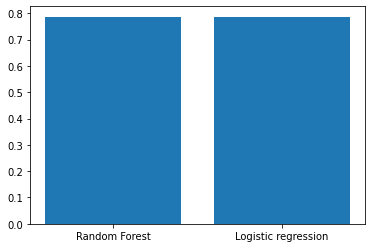

In [0]:
#Here, we can see that the random forest and the logistic regression have more or less the same results

score=[rf_evaluator,lr_evaluator]
models=['Random Forest','Logistic regression']

import matplotlib.pyplot as plt
plt.bar(models, score)
